In [12]:
import scipy.stats as sts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha_tup = (0.001, 0.05, 0.1)
n_tup = (1, 2, 5, 10, 100)

In [13]:
def norm_inter(b, a):
    return sts.norm.ppf(1-a +b, loc=0, scale=1) - sts.norm.ppf(b, loc=0, scale=1)

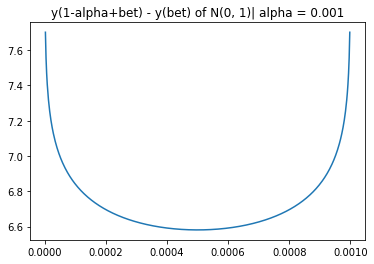

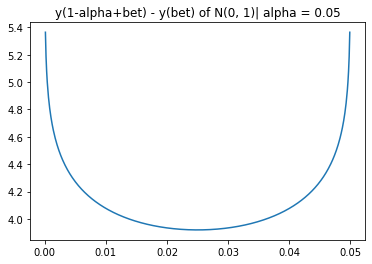

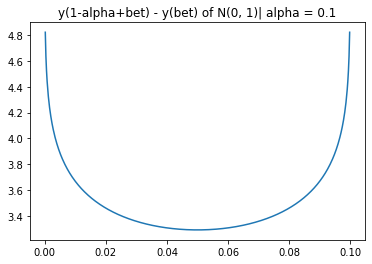

In [15]:
#7.1a
for alpha in alpha_tup:
    domain = np.linspace(0, alpha, 500)
  #  plt.figure(figsize=(10, 5))
    plt.plot(domain, norm_inter(domain, alpha))
    plt.title('y(1-alpha+bet) - y(bet) of N(0, 1)'+'| alpha = ' + str(alpha))
    plt.show()

In [16]:
def gamma_inter(b, a, n):
    return sts.gamma.ppf(1-a+b, n, scale=1) - sts.norm.ppf(b, n, scale=1)

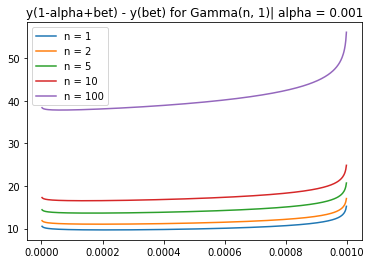

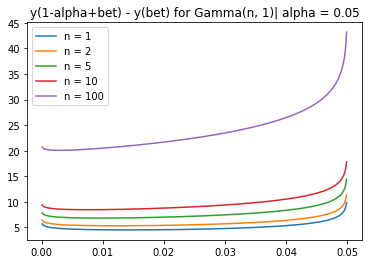

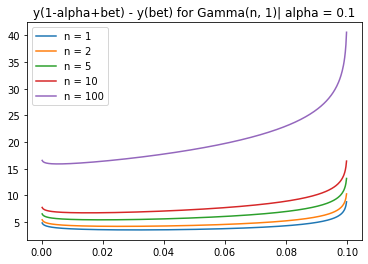

In [17]:
#7.1b
for alpha in alpha_tup:
    domain = np.linspace(0, alpha, 500)
    #  plt.figure(figsize=(10, 5))
    for n in n_tup:
        plt.plot(domain, gamma_inter(domain, alpha, n), label='n = ' + str(n))
    plt.title('y(1-alpha+bet) - y(bet) for Gamma(n, 1)'+'| alpha = ' + str(alpha))
    plt.legend()
    plt.show()

In [19]:
#7.2
TETA = 1
df = pd.DataFrame(columns=['alpha', 'n', 'endpoint1', 'endpoint2', 'P_empiric'])
for alpha in alpha_tup:
    for n in n_tup:
        p_emp = 0
        for i in range(1000):
            sample = sts.uniform.rvs(loc=0, scale=TETA, size=n)
            T = np.mean(sample)
            endpoint1 = 2*T - (2*T*sts.norm.ppf(1 - alpha/2, loc=0, scale=1))/((12*n)**(0.5))
            endpoint2 = 2*T + (2*T*sts.norm.ppf(1 - alpha/2, loc=0, scale=1))/((12*n)**(0.5))
            if (TETA >= endpoint1 and TETA <= endpoint2):
                p_emp += 1
        buf = pd.DataFrame({'alpha': [alpha], 'n': [n], 'endpoint1': [endpoint1], 'endpoint2': [endpoint2], 'P_empiric':[p_emp/1000]})
        df = df.append(buf)
display(df)

,alpha,n,endpoint1,endpoint2,P_empiric
0,0.001,1,0.044217,1.720701,0.743
0,0.001,2,0.122070,0.621522,0.835
0,0.001,5,0.402505,0.997039,0.866
0,0.001,10,0.665714,1.237367,0.875
0,0.001,100,0.927269,1.121920,0.897
0,0.050,1,0.126734,0.457014,0.695
0,0.050,2,0.704761,1.644739,0.702
0,0.050,5,0.865610,1.452047,0.684
0,0.050,10,1.035965,1.487454,0.681
0,0.050,100,0.949856,1.063787,0.656


In [20]:
#7.3
TET_tup = (0.1, 0.4, 0.5, 0.9)
n_tup = (20, 50, 100)
alpha = 0.05 
df = pd.DataFrame(columns=['TETA', 'n', 'len_1', 'len_2'])
for TETA in TET_tup:
    for n in n_tup:
        interval_1 = []
        interval_2 = []
        for i in range(1000):
            sample = sts.bernoulli.rvs(TETA, size=n)
            T = np.mean(sample)
            # Строим асс. доверительный интервал методом подставновки оценки: 
            endpoint1 = T - (sts.norm.ppf(1 - alpha/2, loc=0, scale=1)*((T-T**2)**(0.5)))/(n)**(0.5)
            endpoint2 = T + (sts.norm.ppf(1 - alpha/2, loc=0, scale=1)*((T-T**2)**(0.5)))/(n)**(0.5)
            interval_1.append(endpoint2 - endpoint1)
            # Строим асс. доверительный интервал методом стабилизации асс. дисперсии: 
            endpoint1 = (np.sin(np.arcsin(T**(0.5)) - sts.norm.ppf(1 - alpha/2, loc=0, scale=1)/(2*(n**(0.5)))))**2
            endpoint2 = (np.sin(np.arcsin(T**(0.5)) + sts.norm.ppf(1 - alpha/2, loc=0, scale=1)/(2*(n**(0.5)))))**2
            interval_2.append(endpoint2 - endpoint1)
        buf = pd.DataFrame({'TETA': [TETA], 'n': [n], 'len_1': [np.mean(interval_1)], 'len_2': [np.mean(interval_2)]})
        df = df.append(buf)
display(df)

,TETA,n,len_1,len_2
0,0.1,20,0.235603,0.228133
0,0.1,50,0.159095,0.157066
0,0.1,100,0.115786,0.115046
0,0.4,20,0.418209,0.404950
0,0.4,50,0.268720,0.265292
0,0.4,100,0.191006,0.189785
0,0.5,20,0.426527,0.413003
0,0.5,50,0.274270,0.270772
0,0.5,100,0.194944,0.193698
0,0.9,20,0.233585,0.226179


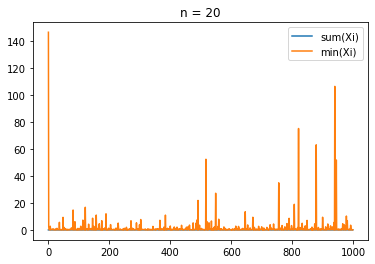

'Interval 1 mean:'

0.046385629983475576

'Interval 2 mean:'

1.3456208859328067

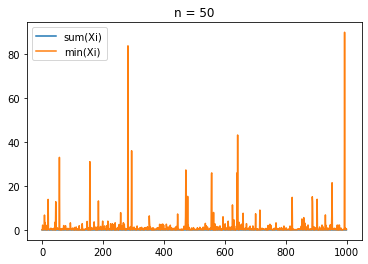

'Interval 1 mean:'

0.028287696230732004

'Interval 2 mean:'

1.1394883964836848

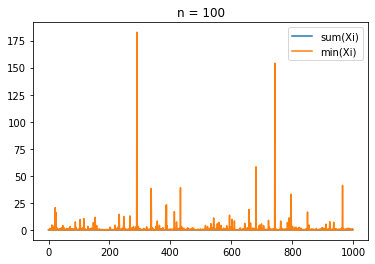

'Interval 1 mean:'

0.019879167641936236

'Interval 2 mean:'

1.431503413083411

In [23]:
#7.4
#Достаточная статистика экспоненциального распределения T = sum(Xi) ~ Gamma(n, 1/TETA)
import seaborn as sns
TETA = 0.05
alpha = 0.05
for n in n_tup:
    interval_1 = []
    interval_2 = []
    for i in range(1000):
        sample = sts.expon.rvs(loc=0, scale=1/TETA, size=n)
        T = np.mean(sample)
        #Строим доверительный интервал с помощью достаточной статистики:
        endpoint1 = sts.gamma.ppf(alpha/2, n, loc=0, scale=1)/(n*T)
        endpoint2 = sts.gamma.ppf(1 - alpha/2, n, loc=0, scale=1)/(n*T)
        interval_1.append(endpoint2 - endpoint1)
        #Строим доверительный интервал с помощью оценки X(1):
        X1 = min(sample)
        endpoint1 = sts.expon.ppf(alpha/2, loc=0, scale=1)/(X1*n)
        endpoint2 = sts.expon.ppf(1 - alpha/2, loc=0, scale=1)/(X1*n)
        interval_2.append(endpoint2 - endpoint1)
    plt.plot(interval_1,label='sum(Xi)')
    plt.plot(interval_2, label='min(Xi)')
    plt.legend()
    plt.title('n = ' + str(n))
    plt.show()
    display('Interval 1 mean:')
    display(np.mean(interval_1))
    display('Interval 2 mean:')
    display(np.mean(interval_2))